In [1]:
# activate the project environment
using Pkg; Pkg.activate(joinpath(@__DIR__, ".."));

  Activating project at `~/projects/julia-projects/dbscan`


In [10]:
using NearestNeighbors
using dbscan
using StaticArrays
using Dates
using CairoMakie

In [20]:
# points = [SVector{3}(rand(3)) for i in 1:1_000_000]
# points = map(i -> rand(3), 1:1_000_000)
# points = [rand(3) for _ in 1:1_000_000]
points = rand(SVector{2, Float64}, 1_000)

1000-element Vector{SVector{2, Float64}}:
 [0.8591894770597748, 0.23475781318692246]
 [0.7534016374391059, 0.5824232125204086]
 [0.8494136191145775, 0.3142834091319935]
 [0.8282526931389869, 0.4724826912855957]
 [0.8414143239515995, 0.7264155025580429]
 [0.22893462150489352, 0.18876083531914245]
 [0.8796736225291081, 0.033731378071956475]
 [0.6281377491634497, 0.8863681960663881]
 [0.38076276597805125, 0.20403121553935544]
 [0.18605512182091244, 0.4410348382562983]
 ⋮
 [0.4191646086171944, 0.616785410593036]
 [0.8804691999019081, 0.9793865053328998]
 [0.7887599384592495, 0.024819233173165478]
 [0.3026383470179804, 0.09213695399991628]
 [0.17996653872842305, 0.29222259793641314]
 [0.849831995373684, 0.5829251841988499]
 [0.614334119740695, 0.5747631057444393]
 [0.6424108347040202, 0.1479251704372323]
 [0.8839862386931003, 0.30466402649255764]

In [35]:
cluster_radius = 0.03
min_pts = 3

3

In [36]:
labels = dbscan.DBSCAN(points, cluster_radius, min_pts; n_chunks = 4)

1000-element Vector{Int64}:
 994
   0
 994
   0
 850
 956
 979
   0
 947
 915
   ⋮
 992
 993
 994
 995
 996
 997
   0
   0
   0

In [37]:
clusters = Dict([i => Int[] for i in unique(labels[labels .!= 0])])
for (i, l) in pairs(labels)
    if l != 0
        push!(clusters[l], i)
    end
end

In [38]:
clusters

Dict{Int64, Vector{Int64}} with 91 entries:
  830 => [50, 159, 325, 339, 542, 585, 694, 783, 830]
  719 => [234, 545, 582, 719]
  792 => [144, 193, 237, 383, 561, 565, 579, 706, 792]
  660 => [514, 660]
  926 => [78, 330, 331, 433, 554, 555, 926]
  910 => [100, 167, 214, 242, 243, 279, 341, 351, 444, 539, 568, 682, 690, 771,…
  985 => [34, 84, 92, 114, 116, 122, 195, 207, 209, 239  …  576, 614, 634, 782,…
  808 => [342, 653, 808]
  748 => [102, 748]
  817 => [280, 408, 546, 547, 609, 817]
  966 => [362, 438, 966]
  996 => [64, 99, 143, 176, 381, 424, 635, 711, 772, 780, 798, 802, 861, 865, 9…
  856 => [48, 241, 268, 295, 372, 405, 412, 416, 431, 472  …  505, 507, 624, 67…
  897 => [323, 394, 663, 871, 897]
  925 => [31, 443, 738, 925]
  524 => [120, 141, 420, 425, 524]
  942 => [172, 631, 685, 942]
  853 => [14, 604, 853]
  770 => [559, 600, 770]
  ⋮   => ⋮

In [48]:
function draw_circle!(ax, x0, y0, r)
    t = 0:0.01:2pi
    x = x0 .+ r .* cos.(t)
    y = y0 .+ r .* sin.(t)
    lines!(ax, x, y; color = :black, alpha = 0.1)
end

draw_circle! (generic function with 1 method)

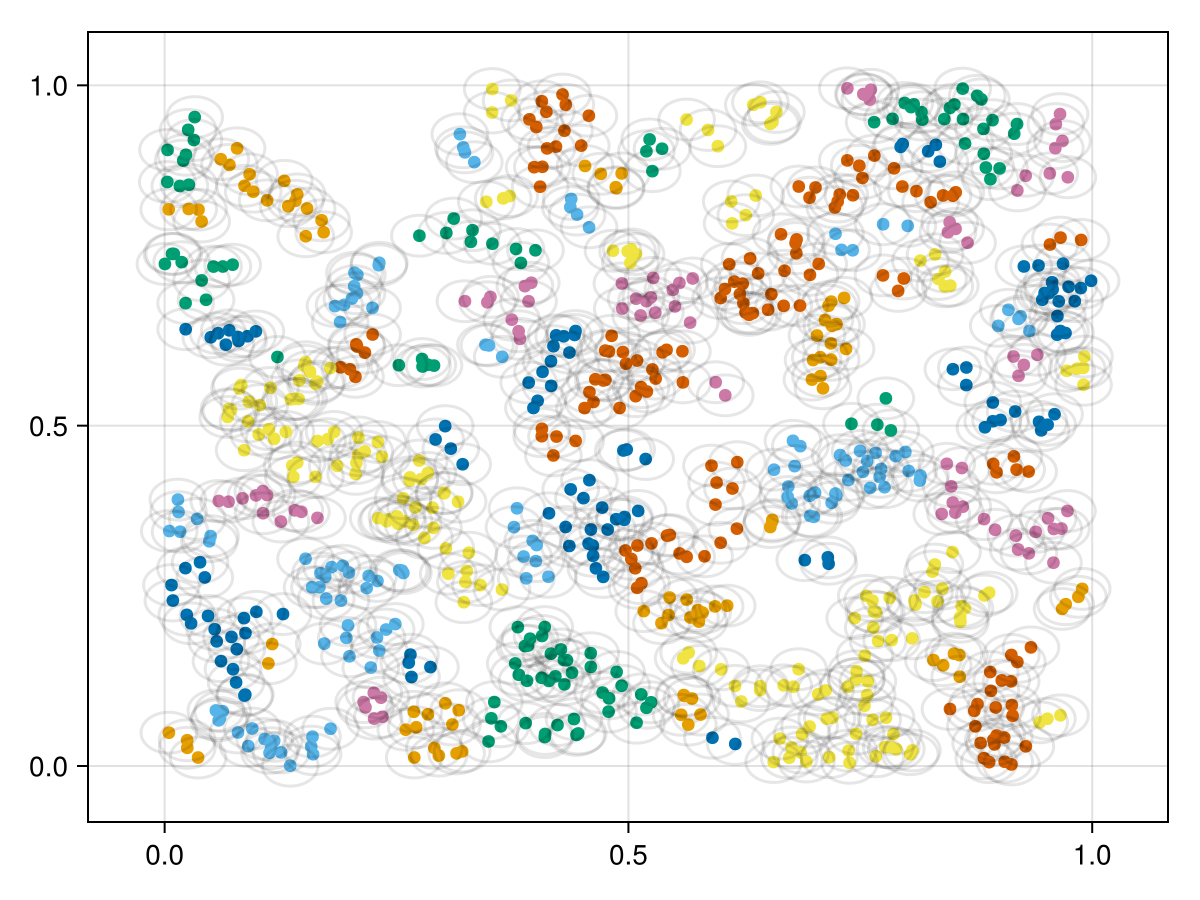

In [49]:
f = Figure()
ax = Axis(f[1, 1])

for (id, cluster) in pairs(clusters)
    scatter!(points[cluster])
    for (x0, y0) in points[cluster]
        draw_circle!(ax, x0, y0, cluster_radius)
    end
end

f

In [50]:
# wrap timings in a function to avoid global variables causing problems
function run_tests(N; n_chunks = 1)
    times = zeros(N)
    for i in 1:N
        points = rand(SVector{3, Float64}, 1_000_000)
        t0 = now()
        labels = dbscan.DBSCAN(points, 0.01, 3, n_chunks = n_chunks)
        tf = now()
        times[i] = (tf - t0).value / 1000
    end
    return times
end

run_tests (generic function with 1 method)

In [51]:
times_1 = run_tests(10; n_chunks = 1)

10-element Vector{Float64}:
 1.369
 1.411
 1.356
 1.261
 1.381
 1.327
 1.227
 1.355
 1.339
 1.305

In [52]:
times_2 = run_tests(10; n_chunks = 2)

10-element Vector{Float64}:
 1.067
 0.858
 0.876
 0.944
 0.886
 0.967
 0.848
 0.917
 0.845
 0.962

In [53]:
times_4 = run_tests(10; n_chunks = 4)

10-element Vector{Float64}:
 0.85
 0.819
 0.765
 0.821
 0.816
 0.682
 0.855
 0.923
 0.667
 0.783

In [ ]:
# smaller dataset for plotting